<a href="https://colab.research.google.com/github/48856035/Gemini-Python-API/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jieba wordcloud matplotlib pandas


In [2]:
!wget -O NotoSansCJK-Regular.ttc https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
!unzip -o NotoSansCJK-Regular.ttc -d fonts/
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 指定中文字體路徑
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJKtc-Regular.otf"


# 測試中文字體可用
font_path = "/usr/share/fonts/truetype/noto/NotoSansCJKtc-Regular.otf"


--2025-05-31 18:48:17--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 108.177.97.207, 108.177.125.207, 142.250.157.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJK-Regular.ttc’

NotoSansCJK-Regular 100%[===================>] 115.63M  31.1MB/s    in 4.6s    

2025-05-31 18:48:22 (25.4 MB/s) - ‘NotoSansCJK-Regular.ttc’ saved [121247366/121247366]

Archive:  NotoSansCJK-Regular.ttc
  inflating: fonts/LICENSE_OFL.txt   
  inflating: fonts/NotoSansCJKtc-Black.otf  
  inflating: fonts/NotoSansCJKtc-Bold.otf  
  inflating: fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: fonts/NotoSansCJKtc-Light.otf  
  inflating: fonts/NotoSansCJKtc-Medium.otf  
  inflating: fonts/NotoSansCJ

In [3]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter


In [4]:
from google.colab import files
uploaded = files.upload()

# 假設檔名為 mydata.csv，且文字欄位叫做 'content'
df = pd.read_csv("chat_data.csv")
texts = df['content'].dropna().astype(str).tolist()


Saving chat_data.csv to chat_data (1).csv


In [5]:
df

,speaker,content
0,阿道,我笑爛，他居然這樣回，牛逼啦！
1,阿道,真的假的？這也太猛了吧
2,阿道,下次我們約唱歌，阿道你不要再放鳥
3,阿道,我家貓昨天把沙發咬破，我爸整個爆氣
4,阿道,你快點傳影片來啦，我要看那段超有料
...,...,...
95,馬魯,昨天打籃球差點閃到腰啦的啦
96,馬魯,田娜，我差點笑到噴飯哈哈哈
97,馬魯,馬魯你有空要不要來家裡烤肉
98,馬魯,我笑爛，他居然這樣回，牛逼啦！


In [7]:
stopwords=()


# 去除標點、斷詞、過濾停用詞
def clean_and_tokenize(text):
    text = re.sub(r'[^\u4e00-\u9fa5]', '', text)  # 去除非中文
    words = jieba.cut(text)
    return [word for word in words if word not in stopwords and len(word) > 1]

all_words = []
for t in texts:
    all_words.extend(clean_and_tokenize(t))


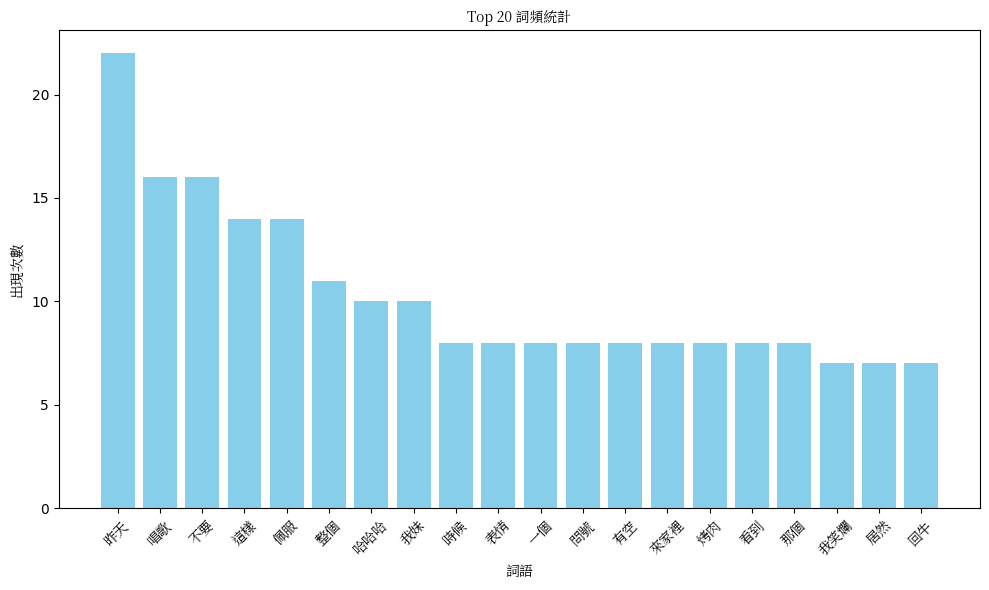

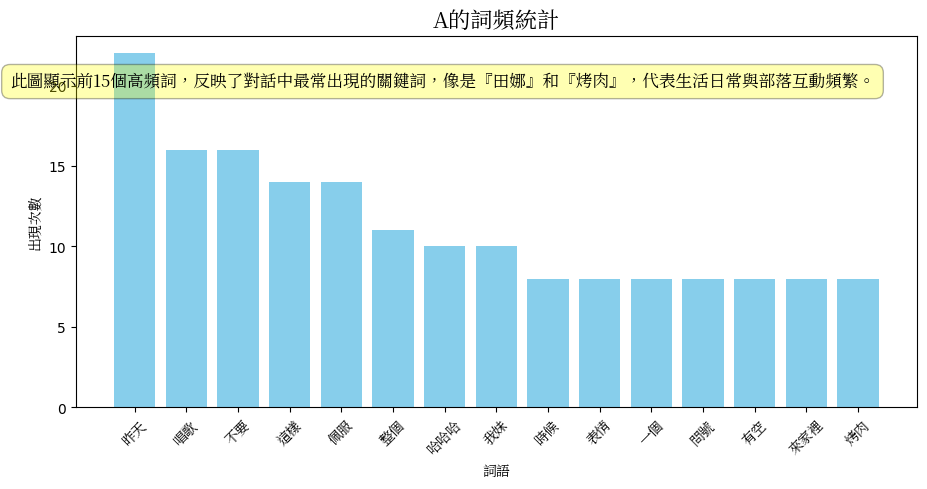

In [20]:
import matplotlib.pyplot as plt
import matplotlib

# 設定字體路徑為剛下載的字體檔
font_path = "SourceHanSerifTC-Regular.otf"

# 建立 fontprop
from matplotlib.font_manager import FontProperties
font_prop = FontProperties(fname=font_path)

# 產生詞頻資料 (示範用)
from collections import Counter
counter = Counter(all_words)  # 你本來的詞列表
counter_A = Counter(all_words)
top_words = counter.most_common(20)

words, freqs = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')

# 設定字體屬性給 xticks 和 title
plt.xticks(rotation=45, fontproperties=font_prop)
plt.title("Top 20 詞頻統計", fontproperties=font_prop)
plt.xlabel("詞語", fontproperties=font_prop)
plt.ylabel("出現次數", fontproperties=font_prop)

plt.tight_layout()
plt.savefig("bar_chart.png")
plt.show()

def plot_bar_with_annotation(counter, title, annotation_text):
    top = counter.most_common(15)
    words, counts = zip(*top)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts, color='skyblue')
    plt.xticks(rotation=45, fontproperties=font_prop)
    plt.title(title, fontproperties=font_prop, fontsize=16)
    plt.xlabel('詞語', fontproperties=font_prop)
    plt.ylabel('出現次數', fontproperties=font_prop)

    # 加註解文字，xy是位置(相對座標)，xycoords='axes fraction' 表示用座標軸百分比位置
    plt.text(0.95, 0.9, annotation_text, transform=plt.gca().transAxes,
             fontsize=12, fontproperties=font_prop,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.3))
    plt.tight_layout()
    plt.show()

# 假設你要的註解文字
annotation_text = "此圖顯示前15個高頻詞，反映了對話中最常出現的關鍵詞，像是『田娜』和『烤肉』，代表生活日常與部落互動頻繁。"

# 呼叫函數繪製條形圖並加入解說文字
plot_bar_with_annotation(counter_A, "A的詞頻統計", annotation_text)








In [11]:
!wget -O SourceHanSerifTC-Regular.otf https://github.com/adobe-fonts/source-han-serif/raw/release/OTF/TraditionalChinese/SourceHanSerifTC-Regular.otf



--2025-05-31 18:52:37--  https://github.com/adobe-fonts/source-han-serif/raw/release/OTF/TraditionalChinese/SourceHanSerifTC-Regular.otf
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/OTF/TraditionalChinese/SourceHanSerifTC-Regular.otf [following]
--2025-05-31 18:52:37--  https://raw.githubusercontent.com/adobe-fonts/source-han-serif/release/OTF/TraditionalChinese/SourceHanSerifTC-Regular.otf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24542148 (23M) [application/octet-stream]
Saving to: ‘SourceHanSerifTC-Regular.otf’

SourceHanSerifTC-Re 100%[========

<ipython-input-21-02b2710e6081>:21: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.savefig("wordcloud.png")
<ipython-input-21-02b2710e6081>:21: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.savefig("wordcloud.png")
<ipython-input-21-02b2710e6081>:21: UserWarning: Glyph 38642 (\N{CJK UNIFIED IDEOGRAPH-96F2}) missing from font(s) DejaVu Sans.
  plt.savefig("wordcloud.png")


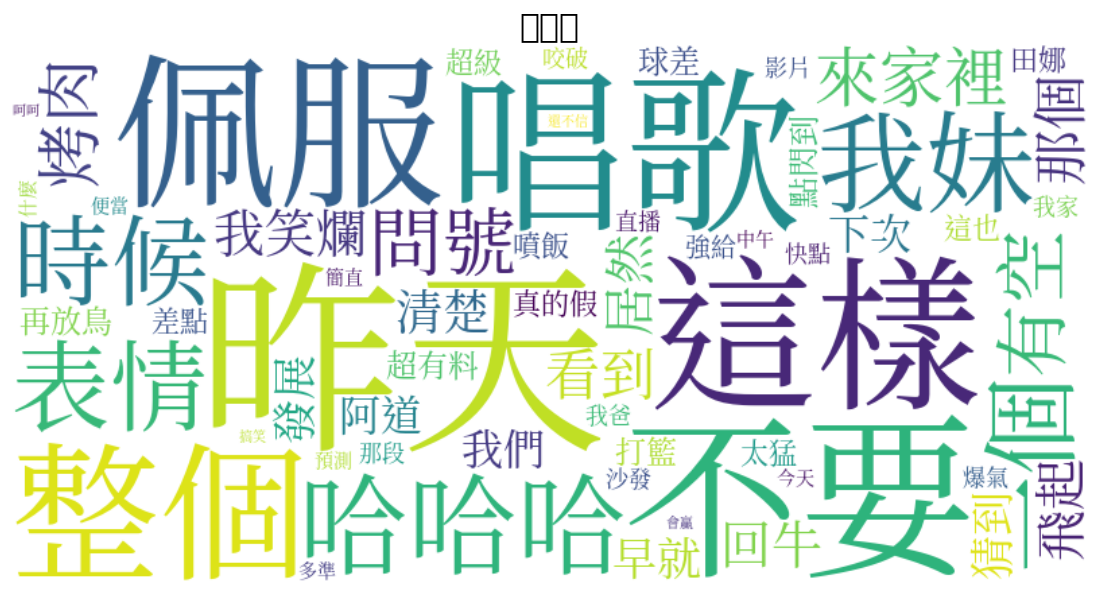

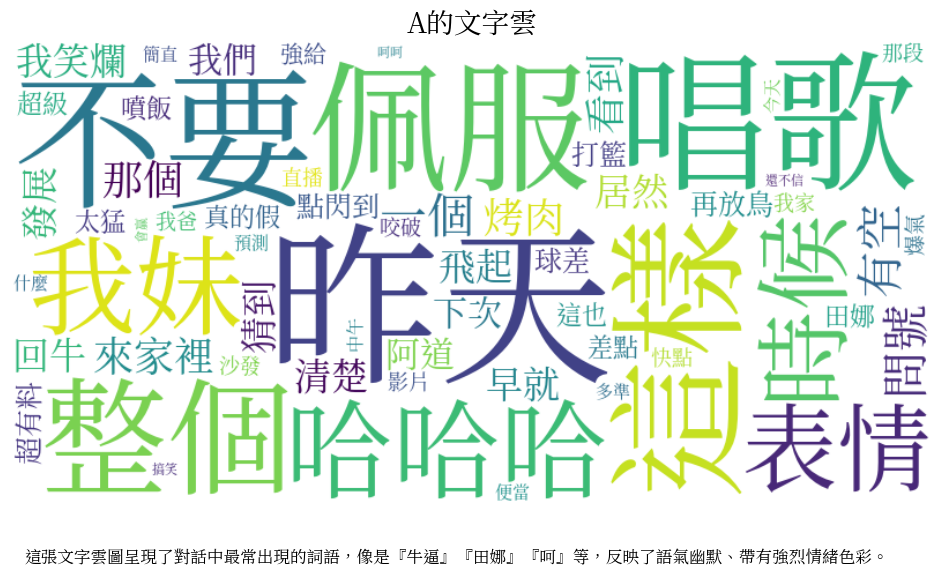

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = "SourceHanSerifTC-Regular.otf"

# 假設你有一個 counter 詞頻字典，例如：
# from collections import Counter
# counter = Counter({"你好": 10, "世界": 8, "原住民": 6})

wc = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color="white"
).generate_from_frequencies(counter)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("文字雲", fontsize=24)
plt.savefig("wordcloud.png")
plt.show()

def plot_wordcloud_with_annotation(counter, title, annotation_text):
    wc = WordCloud(font_path=font_path, background_color='white', width=800, height=400)
    wc = wc.generate_from_frequencies(counter)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontproperties=font_prop, fontsize=20)

    # 在圖底部印說明文字
    plt.figtext(0.5, 0.01, annotation_text, wrap=True, horizontalalignment='center', fontproperties=font_prop, fontsize=12)

    plt.show()

annotation_text = "這張文字雲圖呈現了對話中最常出現的詞語，像是『牛逼』『田娜』『呵』等，反映了語氣幽默、帶有強烈情緒色彩。"
plot_wordcloud_with_annotation(counter_A, "A的文字雲", annotation_text)




